In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [89]:
dorm = pd.read_csv('https://raw.githubusercontent.com/sbuckingham/HackOhio22/refs/heads/main/Dorm%20Buildings.csv').dropna(axis = 1, how = 'all')
non_dorm = pd.read_csv('https://raw.githubusercontent.com/sbuckingham/HackOhio22/refs/heads/main/Non-Dorm%20Buildings.csv').dropna(axis = 1, how = 'all')
weather = pd.read_csv('https://raw.githubusercontent.com/sbuckingham/HackOhio22/refs/heads/main/Weather%20Data.csv').dropna(axis = 1, how = 'all')

#### How does energy conmeanption vary in dormitories vs. non-dorm buildings? Are there patterns that emerge with occupancy?

In [90]:
dorm

,Series Name,Busch House - Occupancy (DEV),Taylor Tower - Occupancy (DEV),Smith-Steeb Hall - Occupancy (DEV),Baker Hall - Occupancy (DEV),"Morrill, Justin S, Tower - Occupancy (DEV)",Busch House - Electricity Consumption (kBTU),Busch House - Chilled Water Consumption (kBTU),Busch House - Hot Water Consumption (kBTU),Busch House - Total Energy Consumption (Cleaned) (kBTU),...,Smith-Steeb Hall - Hot Water Consumption (kBTU),Smith-Steeb Hall - Total Energy Consumption (Cleaned) (kBTU),Baker Hall - Electricity Consumption (kBTU),Baker Hall - Chilled Water Consumption (kBTU),Baker Hall - Hot Water Consumption (kBTU),Baker Hall - Total Energy Consumption (Cleaned) (kBTU),"Morrill, Justin S, Tower - Steam Consumption (kBTU)","Morrill, Justin S, Tower - Electricity Consumption (kBTU)","Morrill, Justin S, Tower - Total Energy Consumption (Cleaned) (kBTU)","Morrill, Justin S, Tower - Natural Gas Consumption (kBTU)"
0,2017-01-01T05:00:00,NaN,NaN,NaN,NaN,NaN,219.059493,NaN,730.75,949.809493,...,876.00,1800.421919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T06:00:00,NaN,NaN,NaN,NaN,NaN,219.144796,NaN,752.75,971.894796,...,799.00,1723.834060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01T07:00:00,NaN,NaN,NaN,NaN,NaN,233.520149,NaN,748.00,981.520149,...,913.00,1798.418715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01T08:00:00,NaN,NaN,NaN,NaN,NaN,233.175523,NaN,705.50,938.675523,...,797.00,1629.530520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T09:00:00,NaN,NaN,NaN,NaN,NaN,233.646398,NaN,617.37,851.016398,...,720.00,1549.000166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50510,2022-10-06T19:00:00,958.0,1128.0,2044.0,581.0,2049.0,339.746942,611.58,114.90,1066.226942,...,1546.40,4067.711521,555.300717,147.412645,467.570,1170.283362,484.17,1713.435242,2197.605242,0.000000
50511,2022-10-06T20:00:00,1029.0,1273.0,2169.0,633.0,2140.0,417.884986,585.06,0.00,1002.944986,...,1529.08,4135.428857,573.239464,114.425625,423.350,1111.015089,495.50,1652.832052,2168.855321,20.523269
50512,2022-10-06T21:00:00,1102.0,1413.0,2289.0,676.0,2248.0,406.317826,544.14,196.88,1147.337826,...,1455.60,4091.578513,557.180717,105.127500,315.525,977.833217,262.16,1608.902861,1871.062861,0.000000
50513,2022-10-06T22:00:00,1143.0,1463.0,2408.0,709.0,2353.0,359.332635,562.05,113.12,1034.502635,...,1458.60,4076.445136,543.541981,96.236250,386.385,1026.163231,196.59,1597.526667,1794.116667,0.000000


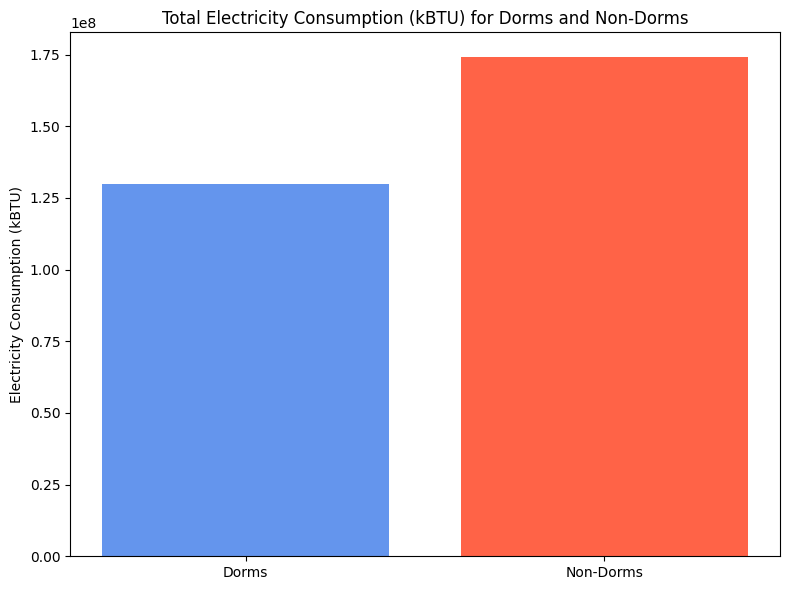

In [91]:
# Extract electricity consumption columns for dorms and non-dorms
dorm_electricity_columns = [col for col in dorm.columns if 'Electricity Consumption' in col]
non_dorm_electricity_columns = [col for col in non_dorm.columns if 'Electricity Consumption' in col]

# Calculate total electricity consumption for dorms and non-dorms
dorm_electricity_total = dorm[dorm_electricity_columns].sum().sum()
non_dorm_electricity_total = non_dorm[non_dorm_electricity_columns].sum().sum()

# Create a bar plot to compare electricity consumption
labels = ['Dorms', 'Non-Dorms']
electricity_consumption_values = [dorm_electricity_total, non_dorm_electricity_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, electricity_consumption_values, color=['cornflowerblue', 'tomato'])
plt.title('Total Electricity Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Electricity Consumption (kBTU)')
plt.tight_layout()
plt.show()

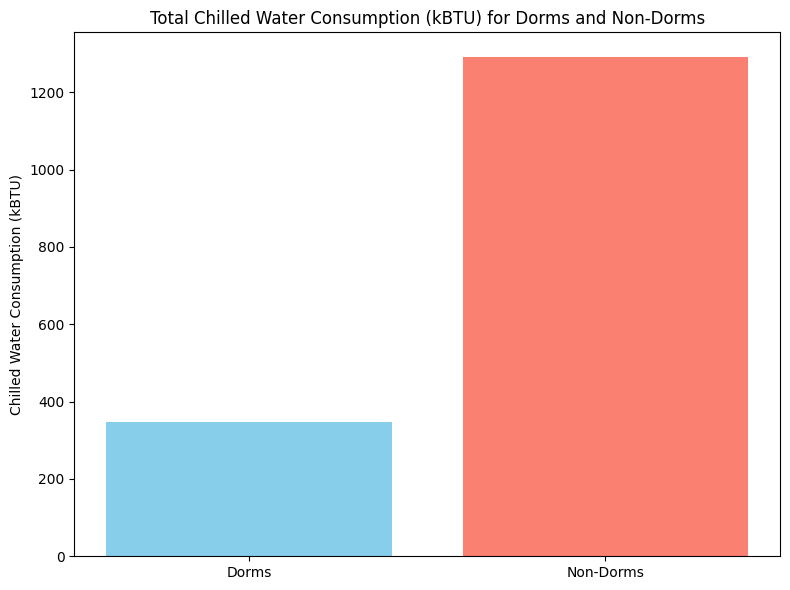

In [97]:
# Extract chilled water conmeanption columns for dorms and non-dorms
dorm_chilled_water_columns = [col for col in dorm.columns if 'Chilled Water Consumption' in col]
non_dorm_chilled_water_columns = [col for col in non_dorm.columns if 'Chilled Water Consumption' in col]

# Calculate total chilled water conmeanption for dorms and non-dorms
dorm_chilled_water_total = dorm[dorm_chilled_water_columns].mean().mean()
non_dorm_chilled_water_total = non_dorm[non_dorm_chilled_water_columns].mean().mean()

# Create a bar plot to compare chilled water conmeanption
labels = ['Dorms', 'Non-Dorms']
consumption_values = [dorm_chilled_water_total, non_dorm_chilled_water_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, consumption_values, color=['skyblue', 'salmon'])
plt.title('Total Chilled Water Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Chilled Water Consumption (kBTU)')
plt.tight_layout()
plt.show()

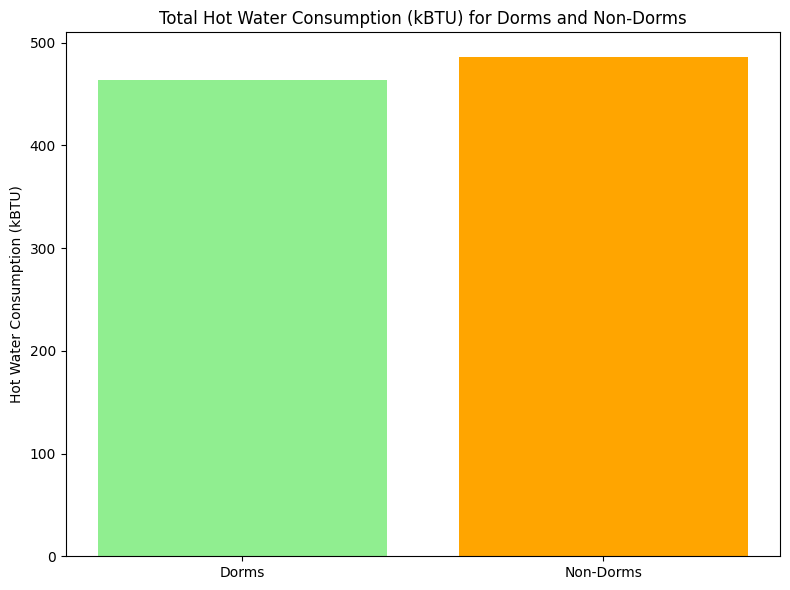

In [98]:
# Extract hot water conmeanption columns for dorms and non-dorms
dorm_hot_water_columns = [col for col in dorm.columns if 'Hot Water Consumption' in col]
non_dorm_hot_water_columns = [col for col in non_dorm.columns if 'Hot Water Consumption' in col]

# Calculate total hot water conmeanption for dorms and non-dorms
dorm_hot_water_total = dorm[dorm_hot_water_columns].mean().mean()
non_dorm_hot_water_total = non_dorm[non_dorm_hot_water_columns].mean().mean()

# Create a bar plot to compare hot water conmeanption
labels = ['Dorms', 'Non-Dorms']
hot_water_consumption_values = [dorm_hot_water_total, non_dorm_hot_water_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, hot_water_consumption_values, color=['lightgreen', 'orange'])
plt.title('Total Hot Water Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Hot Water Consumption (kBTU)')
plt.tight_layout()
plt.show()

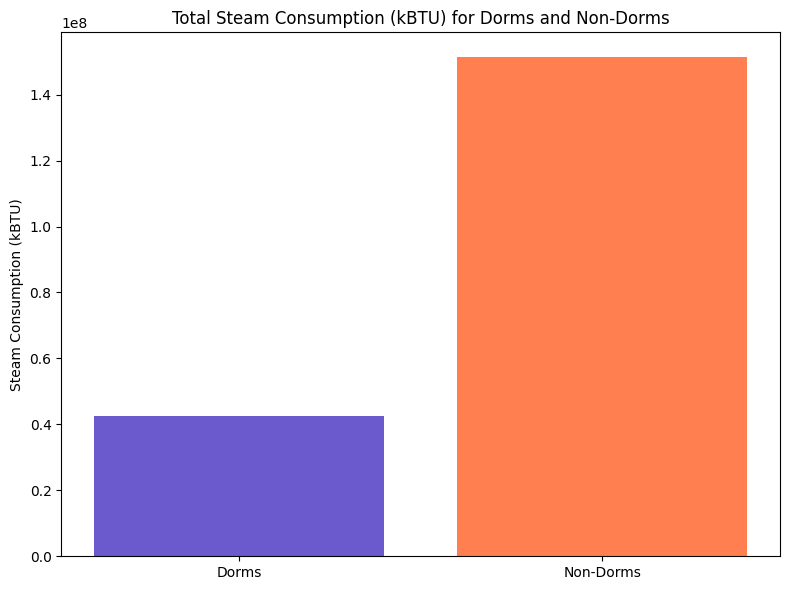

In [99]:
# Extract steam consumption columns for dorms and non-dorms
dorm_steam_columns = [col for col in dorm.columns if 'Steam Consumption' in col]
non_dorm_steam_columns = [col for col in non_dorm.columns if 'Steam Consumption' in col]

# Calculate total steam consumption for dorms and non-dorms
dorm_steam_total = dorm[dorm_steam_columns].sum().sum()
non_dorm_steam_total = non_dorm[non_dorm_steam_columns].sum().sum()

# Create a bar plot to compare steam consumption
labels = ['Dorms', 'Non-Dorms']
steam_consumption_values = [dorm_steam_total, non_dorm_steam_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, steam_consumption_values, color=['slateblue', 'coral'])
plt.title('Total Steam Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Steam Consumption (kBTU)')
plt.tight_layout()
plt.show()

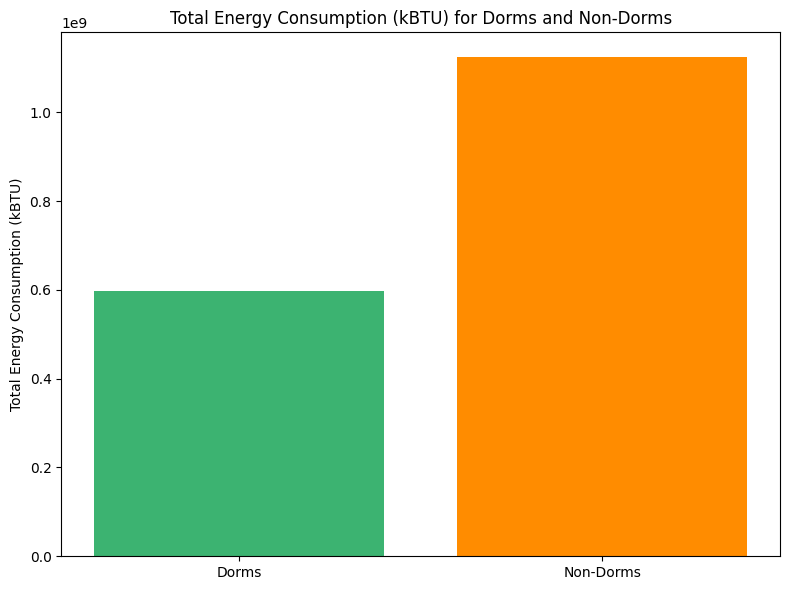

In [95]:
# Extract all energy consumption columns for dorms and non-dorms
dorm_energy_columns = [col for col in dorm.columns if 'Consumption' in col]
non_dorm_energy_columns = [col for col in non_dorm.columns if 'Consumption' in col]

# Calculate total energy consumption for dorms and non-dorms
dorm_total_energy = dorm[dorm_energy_columns].sum().sum()
non_dorm_total_energy = non_dorm[non_dorm_energy_columns].sum().sum()

# Create a bar plot to compare total energy consumption
labels = ['Dorms', 'Non-Dorms']
total_energy_values = [dorm_total_energy, non_dorm_total_energy]

plt.figure(figsize=(8, 6))
plt.bar(labels, total_energy_values, color=['mediumseagreen', 'darkorange'])
plt.title('Total Energy Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Total Energy Consumption (kBTU)')
plt.tight_layout()
plt.show()

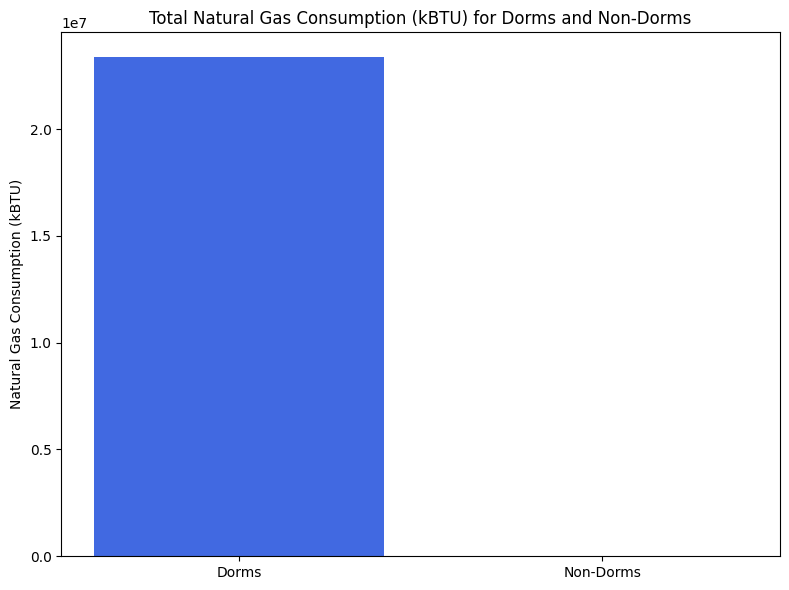

In [96]:
# Extract natural gas consumption columns for dorms and non-dorms
dorm_natural_gas_columns = [col for col in dorm.columns if 'Natural Gas Consumption' in col]
non_dorm_natural_gas_columns = [col for col in non_dorm.columns if 'Natural Gas Consumption' in col]

# Calculate total natural gas consumption for dorms and non-dorms
dorm_natural_gas_total = dorm[dorm_natural_gas_columns].sum().sum()
non_dorm_natural_gas_total = non_dorm[non_dorm_natural_gas_columns].sum().sum()

# Create a bar plot to compare natural gas consumption
labels = ['Dorms', 'Non-Dorms']
natural_gas_consumption_values = [dorm_natural_gas_total, non_dorm_natural_gas_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, natural_gas_consumption_values, color=['royalblue', 'firebrick'])
plt.title('Total Natural Gas Consumption (kBTU) for Dorms and Non-Dorms')
plt.ylabel('Natural Gas Consumption (kBTU)')
plt.tight_layout()
plt.show()